In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df1=pd.read_csv('dpe1.csv')
df2=pd.read_csv('dpe2.csv')
colonnes_numeriques = ["surface_utile", "shon",'estimation_ges']
for col in colonnes_numeriques:
    df1[col] = pd.to_numeric(df1[col], errors="coerce")
    
colonnes_numeriques = ["Surface_utile", "Surface_(SHON)",'Emission_GES_kgCO2/m²/an']
for col in colonnes_numeriques:
    df2[col] = pd.to_numeric(df2[col], errors="coerce")
filter1=df1['shon']>0
filter2=df1['surface_utile']>0
filter3=df1['estimation_ges']>0
df1=df1[filter1&filter2&filter3]
filter1=df2['Surface_(SHON)']>0
filter2=df2['Surface_utile']>0
filter3=df2['Emission_GES_kgCO2/m²/an']>0
df2=df2[filter1&filter2&filter3]


C:\Users\marie\AppData\Local\Temp\ipykernel_16484\3965182275.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('dpe1.csv')


In [72]:
df1[['surface_utile','shon','estimation_ges']].describe()


,surface_utile,shon,estimation_ges
count,111102.000000,1.111020e+05,1.111020e+05
mean,190.283049,2.104741e+03,1.148912e+02
std,1241.251282,3.097291e+05,2.024164e+04
min,0.910000,9.000000e-01,7.000000e-02
25%,100.000000,6.700000e+01,7.000000e+00
50%,100.000000,1.370000e+02,1.300000e+01
75%,100.000000,4.000000e+02,3.000000e+01
max,173839.000000,1.000000e+08,4.766768e+06


In [73]:
df2[['Surface_utile','Surface_(SHON)','Emission_GES_kgCO2/m²/an']].describe()

,Surface_utile,Surface_(SHON),Emission_GES_kgCO2/m²/an
count,162120.000000,162120.000000,162120.000000
mean,480.877168,946.766998,37.137219
std,3345.952787,4193.391770,2433.278352
min,1.000000,0.100000,0.100000
25%,100.000000,70.000000,3.600000
50%,100.000000,151.100000,7.600000
75%,100.000000,487.000000,18.300000
max,361381.000000,361381.000000,655185.400000


In [74]:
df=pd.read_csv('fusion.csv')


In [75]:
df = df.reset_index(drop=True)
df.head()

,surface_utile,shon,date_etablissement_dpe,annee_construction,secteur_activite,classe_estimation_ges,estimation_ges,consommation_energie,X_L93,Y_L93
0,40.0,55.30,2013-04-11,1947.0,"Autres cas (par exemple: théâtres, salles de s...",A,1.00,38.00,NaN,NaN
1,5.3,35.43,2013-04-14,1983.0,"Bâtiment à usage principale de bureau, d'admin...",N,0.00,0.00,NaN,NaN
2,0.0,0.00,2013-04-11,1900.0,Centre commercial,N,0.00,0.00,379994.02884,6.570891e+06
3,0.0,0.00,2013-04-02,2001.0,"Bâtiment à usage principale de bureau, d'admin...",B,11.53,123.39,NaN,NaN
4,0.0,21.10,2013-04-15,1947.0,"Autres cas (par exemple: théâtres, salles de s...",N,0.00,0.00,NaN,NaN


In [76]:
df.dropna(subset=['secteur_activite'],inplace=True)

In [77]:
df.sort_values(by=['date_etablissement_dpe','secteur_activite'])

,surface_utile,shon,date_etablissement_dpe,annee_construction,secteur_activite,classe_estimation_ges,estimation_ges,consommation_energie,X_L93,Y_L93
56575,0.0,0.00,2004-10-15,1994.0,"Bâtiment à usage principale de bureau, d'admin...",C,21.39,656.91,6.594646e+05,6.855912e+06
119271,320.0,0.00,2006-01-08,1900.0,"Autres cas (par exemple: théâtres, salles de s...",N,0.00,0.00,4.839328e+05,6.681740e+06
45401,0.0,207.48,2009-12-22,1.0,"Autres cas (par exemple: théâtres, salles de s...",D,26.00,231.00,NaN,NaN
46301,0.0,207.48,2009-12-22,1.0,"Autres cas (par exemple: théâtres, salles de s...",D,26.00,231.00,NaN,NaN
14226,0.0,387.25,2010-04-13,1.0,"Autres cas (par exemple: théâtres, salles de s...",N,0.00,0.00,8.430520e+05,6.516749e+06
...,...,...,...,...,...,...,...,...,...,...
590670,100.0,3539.00,2025-01-19,NaN,Centre commercial,B,6.70,95.30,7.430819e+05,6.746453e+06
596654,3185.0,3185.00,2025-01-19,NaN,Centre commercial,B,8.20,293.30,6.729382e+05,6.829224e+06
598761,100.0,33.90,2025-01-19,NaN,Centre commercial,B,8.80,315.50,6.114114e+05,6.311794e+06
598857,100.0,241.70,2025-01-19,NaN,Centre commercial,B,6.50,232.10,1.045050e+06,6.298771e+06


In [78]:
missing_values=df.isna().sum()
missing_values[missing_values>0]

annee_construction    72709
X_L93                 87028
Y_L93                 87028
dtype: int64

In [79]:
df.dtypes

surface_utile             float64
shon                      float64
date_etablissement_dpe     object
annee_construction        float64
secteur_activite           object
classe_estimation_ges      object
estimation_ges            float64
consommation_energie      float64
X_L93                     float64
Y_L93                     float64
dtype: object

In [80]:
df['date_etablissement_dpe'] = pd.to_datetime(df['date_etablissement_dpe'])
df['month'] = df['date_etablissement_dpe'].dt.month
df['year']=df['date_etablissement_dpe'].dt.year
df['day']=df['date_etablissement_dpe'].dt.day
df['week'] = df['date_etablissement_dpe'] - pd.to_timedelta(df['date_etablissement_dpe'].dt.dayofweek, unit='D')  # Début de la semaine


In [81]:
df

,surface_utile,shon,date_etablissement_dpe,annee_construction,secteur_activite,classe_estimation_ges,estimation_ges,consommation_energie,X_L93,Y_L93,month,year,day,week
0,40.0,55.30,2013-04-11,1947.0,"Autres cas (par exemple: théâtres, salles de s...",A,1.00,38.00,NaN,NaN,4,2013,11,2013-04-08
1,5.3,35.43,2013-04-14,1983.0,"Bâtiment à usage principale de bureau, d'admin...",N,0.00,0.00,NaN,NaN,4,2013,14,2013-04-08
2,0.0,0.00,2013-04-11,1900.0,Centre commercial,N,0.00,0.00,379994.02884,6.570891e+06,4,2013,11,2013-04-08
3,0.0,0.00,2013-04-02,2001.0,"Bâtiment à usage principale de bureau, d'admin...",B,11.53,123.39,NaN,NaN,4,2013,2,2013-04-01
4,0.0,21.10,2013-04-15,1947.0,"Autres cas (par exemple: théâtres, salles de s...",N,0.00,0.00,NaN,NaN,4,2013,15,2013-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604368,100.0,70.00,2022-07-24,NaN,Centre commercial,B,6.00,199.70,649075.64000,6.865655e+06,7,2022,24,2022-07-18
604369,100.0,550.00,2022-03-09,1947.0,Bâtiment à occupation continue (par exemple: h...,E,142.70,1149.40,648703.74000,6.865436e+06,3,2022,9,2022-03-07
604370,100.0,108.00,2024-02-29,NaN,Bâtiment à occupation continue (par exemple: h...,D,26.50,953.40,707735.34000,6.514622e+06,2,2024,29,2024-02-26
604371,100.0,22.10,2022-06-20,NaN,Bâtiment à occupation continue (par exemple: h...,B,4.80,172.30,913970.47000,6.238504e+06,6,2022,20,2022-06-20


In [82]:
np.array(df.columns)

array(['surface_utile', 'shon', 'date_etablissement_dpe',
       'annee_construction', 'secteur_activite', 'classe_estimation_ges',
       'estimation_ges', 'consommation_energie', 'X_L93', 'Y_L93',
       'month', 'year', 'day', 'week'], dtype=object)

<Axes: ylabel='estimation_ges'>

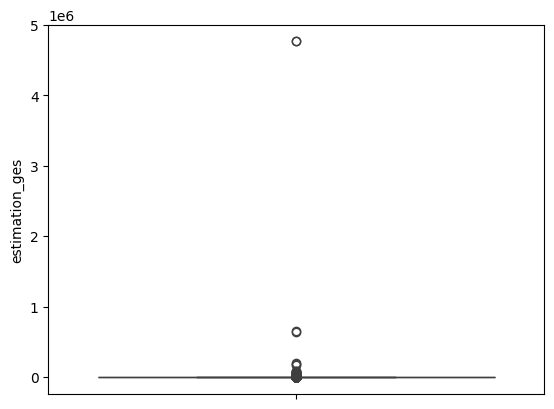

In [83]:
sns.boxplot(df['estimation_ges'])

In [84]:
Q1=df['estimation_ges'].quantile(0.25)
Q3=df['estimation_ges'].quantile(0.75)
IQR=Q3-Q1
filter=(df['estimation_ges']>=(Q1-1.5*IQR))&(df['estimation_ges']<=(Q3+1.5*IQR))
df=df[filter]

<Axes: ylabel='estimation_ges'>

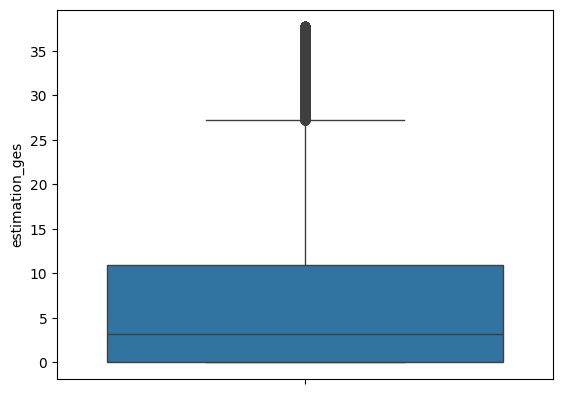

In [85]:
sns.boxplot(df['estimation_ges'])

In [86]:
df['date_etablissement_dpe'].describe()

count                           441375
mean     2019-05-26 16:41:50.909770496
min                2004-10-15 00:00:00
25%                2016-11-08 00:00:00
50%                2019-05-28 00:00:00
75%                2021-11-01 00:00:00
max                2025-01-19 00:00:00
Name: date_etablissement_dpe, dtype: object

<Axes: ylabel='date_etablissement_dpe'>

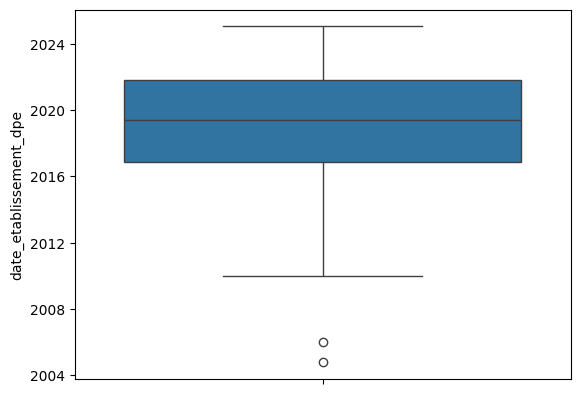

In [87]:
sns.boxplot(df['date_etablissement_dpe'])

In [88]:
Q1=df['date_etablissement_dpe'].quantile(0.25)
Q3=df['date_etablissement_dpe'].quantile(0.75)
IQR=Q3-Q1
filter=(df['date_etablissement_dpe']>=(Q1-1.5*IQR))&(df['date_etablissement_dpe']<=(Q3+1.5*IQR))
df=df[filter]

<Axes: ylabel='date_etablissement_dpe'>

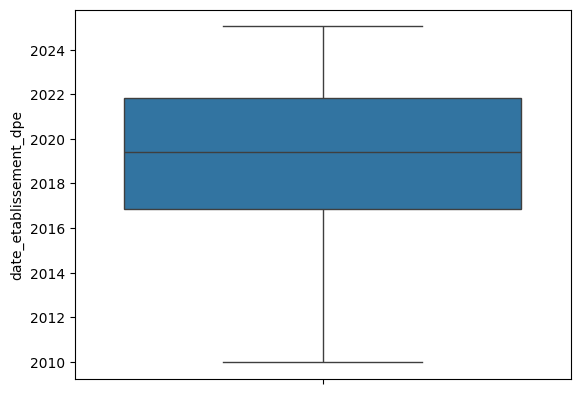

In [89]:
sns.boxplot(df['date_etablissement_dpe'])

In [90]:
df['surface_utile'].describe()

count    441373.000000
mean        233.585985
std        1850.168120
min           0.000000
25%         100.000000
50%         100.000000
75%         100.000000
max      346260.000000
Name: surface_utile, dtype: float64

<Axes: ylabel='surface_utile'>

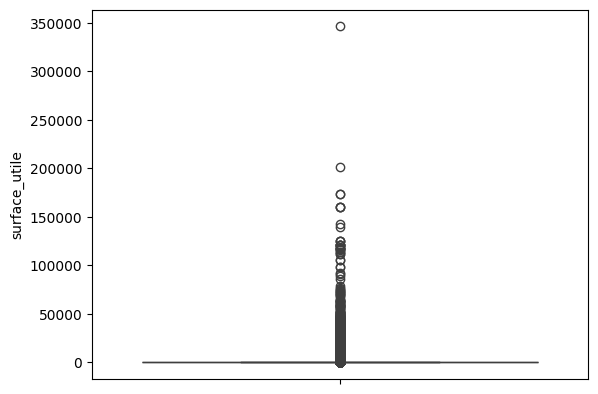

In [91]:
sns.boxplot(df['surface_utile'])

In [92]:
len(df)

441373

In [93]:
Q1=df['surface_utile'].quantile(0.25)
Q3=df['surface_utile'].quantile(0.75)
IQR=Q3-Q1
filter=(df['surface_utile']>=(Q1-1.5*IQR))&(df['surface_utile']<=(Q3+1.5*IQR))
df=df[filter]

In [94]:
len(df)

306722

<Axes: ylabel='surface_utile'>

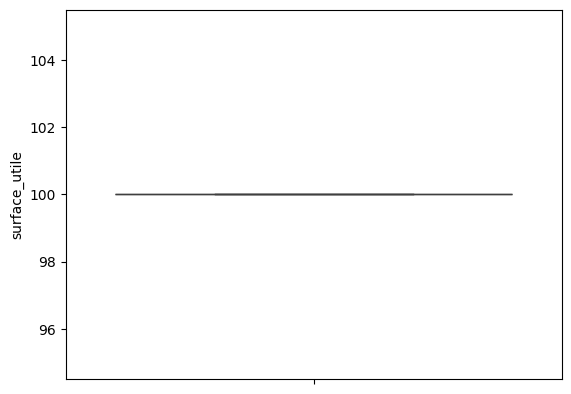

In [95]:
sns.boxplot(df['surface_utile'])

In [116]:
def visualize(secteur_activite, x_axis='month'):
    plt.figure(figsize=(10,6))
    df_filtered = df[df['secteur_activite'] == secteur_activite]

    # Calcul du GES total pondéré par la surface SHON
    df_filtered['ges_weighted'] = df_filtered['estimation_ges'] * df_filtered['shon']

    # Regroupement et calcul du ratio correct
    if x_axis=='month':
        l=['year','month']
    else:
        l=[x_axis]
    df_grouped = df_filtered.groupby(l).agg({
        'ges_weighted': 'sum',  # Somme des GES pondérés
        'shon': 'sum'           # Somme des surfaces utiles
    }).reset_index()

    # Calcul du GES moyen pondéré
    df_grouped['ges_final'] = df_grouped['ges_weighted'] / df_grouped['shon']

    # Tracé du graphique
    df_grouped.plot(y='ges_final', legend=False)
    plt.title(f'Visualisation du GES normalisé pour {secteur_activite}')
    plt.xlabel(x_axis if x_axis else "month")
    plt.ylabel('Estimation GES normalisée')
    plt.show()


In [97]:
sec_act=df['secteur_activite'].unique()

C:\Users\marie\AppData\Local\Temp\ipykernel_16484\2597125821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ges_weighted'] = df_filtered['estimation_ges'] * df_filtered['shon']


<Figure size 1000x600 with 0 Axes>

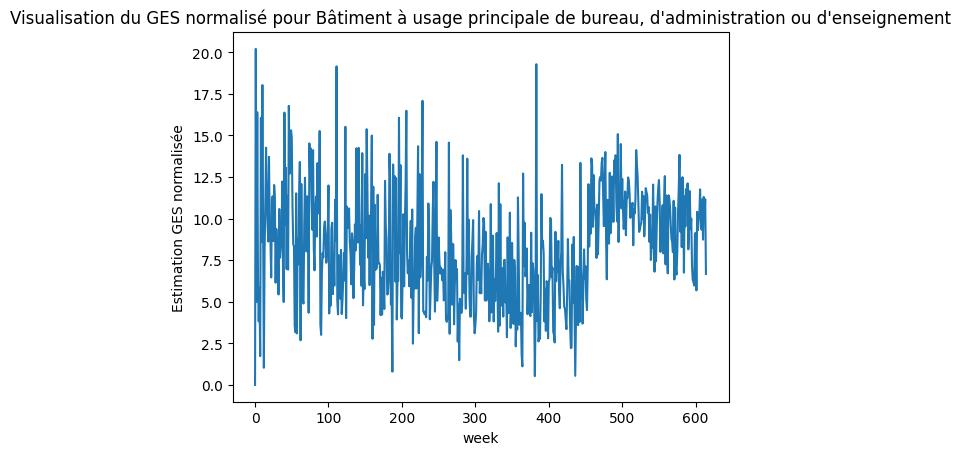

In [117]:
visualize(sec_act[0],x_axis='week')

C:\Users\marie\AppData\Local\Temp\ipykernel_16484\2597125821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ges_weighted'] = df_filtered['estimation_ges'] * df_filtered['shon']


<Figure size 1000x600 with 0 Axes>

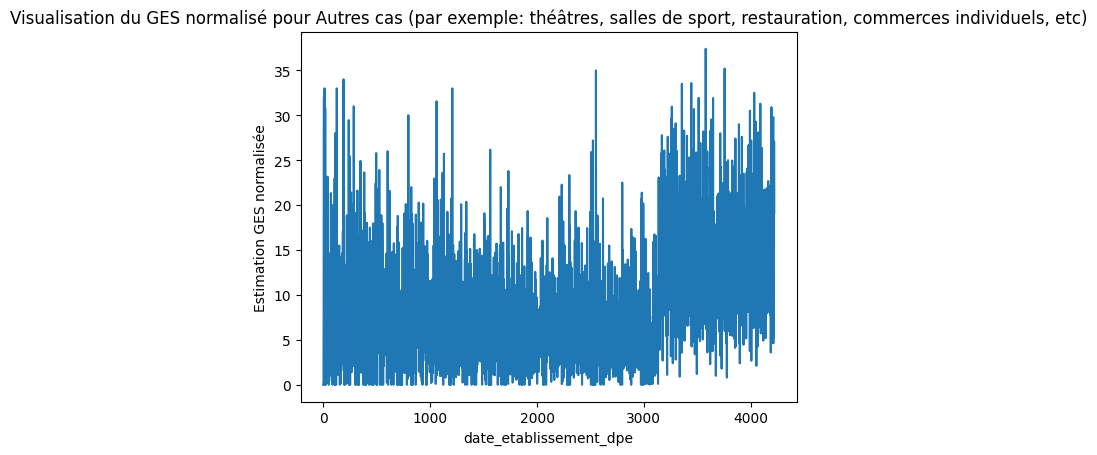

In [119]:
visualize(sec_act[1],x_axis='date_etablissement_dpe')

C:\Users\marie\AppData\Local\Temp\ipykernel_16484\2597125821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ges_weighted'] = df_filtered['estimation_ges'] * df_filtered['shon']


<Figure size 1000x600 with 0 Axes>

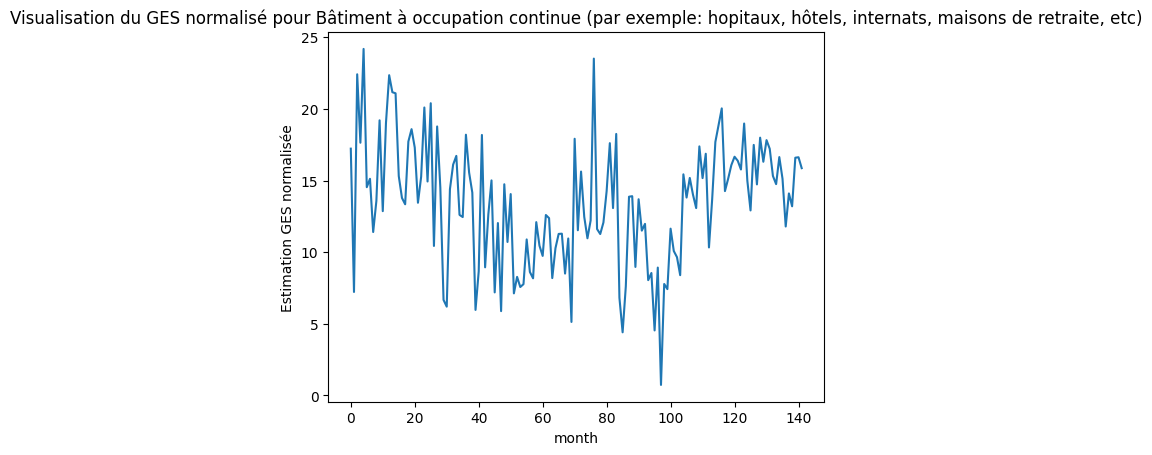

In [120]:
visualize(sec_act[2])

C:\Users\marie\AppData\Local\Temp\ipykernel_16484\2597125821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ges_weighted'] = df_filtered['estimation_ges'] * df_filtered['shon']


<Figure size 1000x600 with 0 Axes>

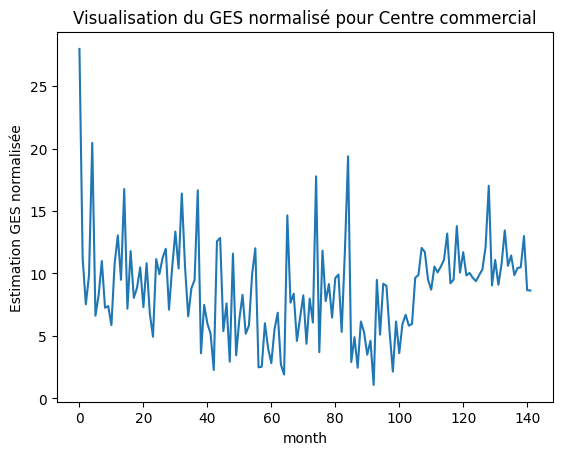

In [121]:
visualize(sec_act[3])

### LSTM


In [202]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

In [358]:

def ges_sec(sec_act):
    df_filtered = df[df['secteur_activite'] == sec_act]

    # Calcul du GES total pondéré par la surface SHON
    df_filtered['ges_weighted'] = df_filtered['estimation_ges'] * df_filtered['shon']

    # Regroupement et calcul du ratio correct
    # if x_axis:
    #     l=['year','month', x_axis]
    # else:
    #     l=['year','month']
    df_grouped = df_filtered.groupby(['year','month']).agg({
        'ges_weighted': 'sum',  # Somme des GES pondérés
        'shon': 'sum'           # Somme des surfaces utiles
    }).reset_index()

    # Calcul du GES moyen pondéré
    df_grouped['ges_final'] = df_grouped['ges_weighted'] / df_grouped['shon']

    X=np.array(df_grouped['ges_final'].tolist())
    return X


In [359]:
X0=ges_sec(sec_act[0])
X1=ges_sec(sec_act[1])
X2=ges_sec(sec_act[2])
X3=ges_sec(sec_act[3])

C:\Users\marie\AppData\Local\Temp\ipykernel_16484\3729143334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ges_weighted'] = df_filtered['estimation_ges'] * df_filtered['shon']
C:\Users\marie\AppData\Local\Temp\ipykernel_16484\3729143334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ges_weighted'] = df_filtered['estimation_ges'] * df_filtered['shon']
C:\Users\marie\AppData\Local\Temp\ipykernel_16484\3729143334.py:5: SettingWithCopyWarning: 
A value is trying to be set on

In [360]:
X=np.concatenate((X0,X1,X2,X3))


In [361]:
X.shape

(574,)

In [362]:
def split(X,n_seq=5):
    X_train=[X[i:i+n_seq] for i in range (len(X)-n_seq)]
    y_train=[X[i+n_seq] for i in range(len(X)-n_seq)]
    return np.array(X_train),np.array(y_train) 

In [373]:
scaler=StandardScaler()
X=scaler.fit_transform(X.reshape(-1,1))
X_train,y_train=split(X,n_seq=30)

In [374]:
X_train.shape

(544, 30, 1)

In [375]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # 1 feature


In [376]:
print(np.isnan(X_train).sum(), np.isnan(y_train).sum())  # Vérifie s'il y a des NaN
print(np.isinf(X_train).sum(), np.isinf(y_train).sum()) 

0 0
0 0


In [377]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)
# Définition du modèle LSTM
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1),return_sequences=False),
     

    Dense(1)  # Une seule sortie
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# Afficher le résumé du modèle
model.summary()
# Entraînement du modèle
model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=60, batch_size=8, verbose=1)

c:\Users\marie\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_59 (LSTM)                  │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8616 - val_loss: 0.6306
Epoch 2/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6301 - val_loss: 0.6161
Epoch 3/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6811 - val_loss: 0.6084
Epoch 4/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5789 - val_loss: 0.5968
Epoch 5/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5310 - val_loss: 0.5912
Epoch 6/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6212 - val_loss: 0.5929
Epoch 7/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4885 - val_loss: 0.5783
Epoch 8/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6124 - val_loss: 0.5922
Epoch 9/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6670 - val_loss: 0.5895
Epoch 10/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6000 - val_loss: 0.5894
Epoch 11/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4793 - val_loss: 0.5725
Epoch 12/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


0.35536857354154955

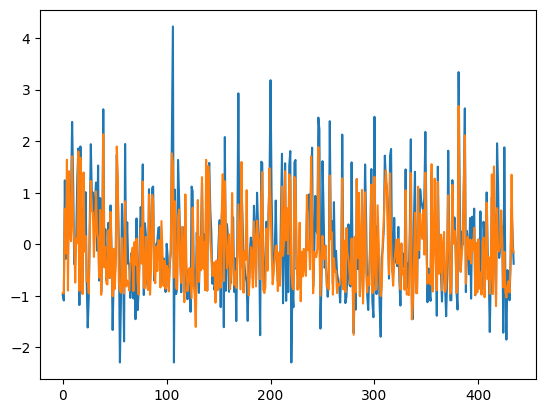

In [378]:
prediction = model.predict(X_train)
idx=np.arange(len(y_train))
plt.plot(idx,y_train)
plt.plot(idx,prediction)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,prediction)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


0.547791362725637

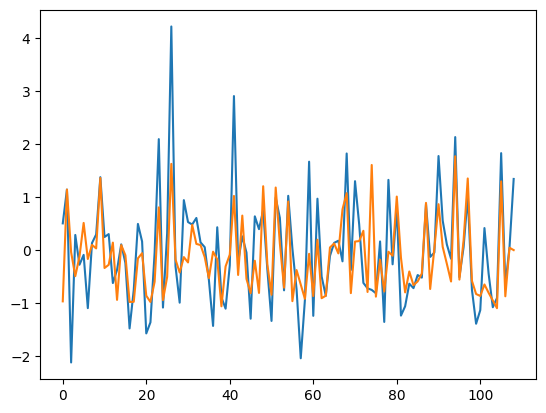

In [379]:
prediction = model.predict(X_val)
idx=np.arange(len(y_val))
plt.plot(idx,y_val)
plt.plot(idx,prediction)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,prediction)